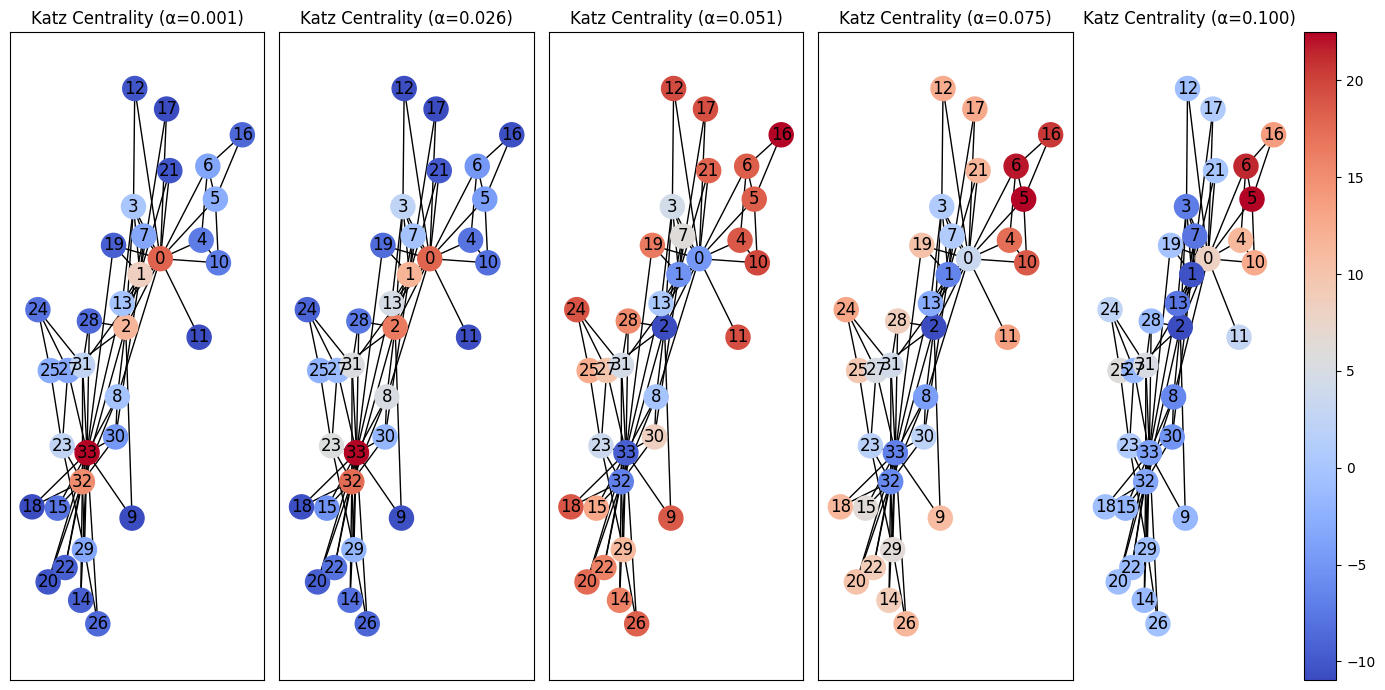

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def katz_centrality(adj_matrix, alpha, beta=1):
    n = adj_matrix.shape[0]
    identity_matrix = np.identity(n)
    try:
        centrality = np.linalg.inv(identity_matrix - alpha * adj_matrix.T) - identity_matrix
        centrality = beta * np.sum(centrality, axis=1)
    except np.linalg.LinAlgError:
        centrality = np.full(n, np.nan)
    return centrality

def nbt_centrality(graph, t):
    betweenness = nx.betweenness_centrality(graph)
    nbt = {node: betweenness[node] * np.power(graph.degree[node], t) for node in graph.nodes}
    return nbt


adjacency_list_path = 'bcspwr01/bcspwr01.mtx'  # Adjust the path as needed
edges = []
with open(adjacency_list_path, 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        edges.append((node1, node2))

G = nx.Graph()
G.add_edges_from(edges)



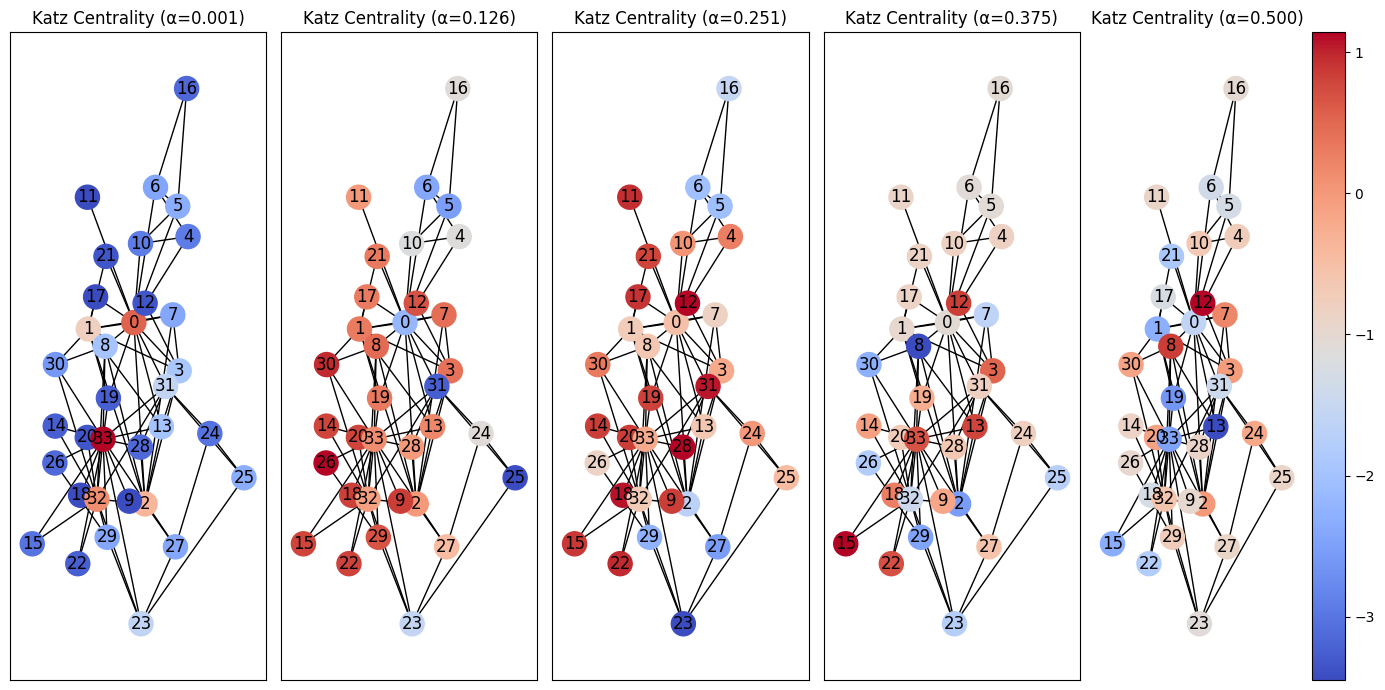

In [4]:

# Compute Katz centrality for different values of alpha
alphas = np.linspace(0.001, 0.5, 5)  # Parameter values for Katz centrality
katz_centralities = {}
for alpha in alphas:
    katz_centralities[alpha] = katz_centrality(nx.adjacency_matrix(G).toarray(), alpha)

# Compute NBT centrality for different values of t
ts = range(1, 6)  # Parameter values for NBT centrality
nbt_centralities = {}
for t in ts:
    nbt_centralities[t] = nbt_centrality(G, t)

# Plot the results for Katz centrality
fig, axs = plt.subplots(1, len(alphas), figsize=(14, 7))
pos = nx.kamada_kawai_layout(G)
for i, alpha in enumerate(alphas):
    ax = axs[i]
    plt.sca(ax)
    plt.title(f'Katz Centrality (α={alpha:.3f})')
    centrality_values = katz_centralities[alpha]
    nodes = nx.draw_networkx_nodes(G, pos, node_color=centrality_values, cmap=plt.cm.coolwarm, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
plt.axis('off')
fig.colorbar(nodes, ax=ax)

plt.tight_layout()
plt.show()

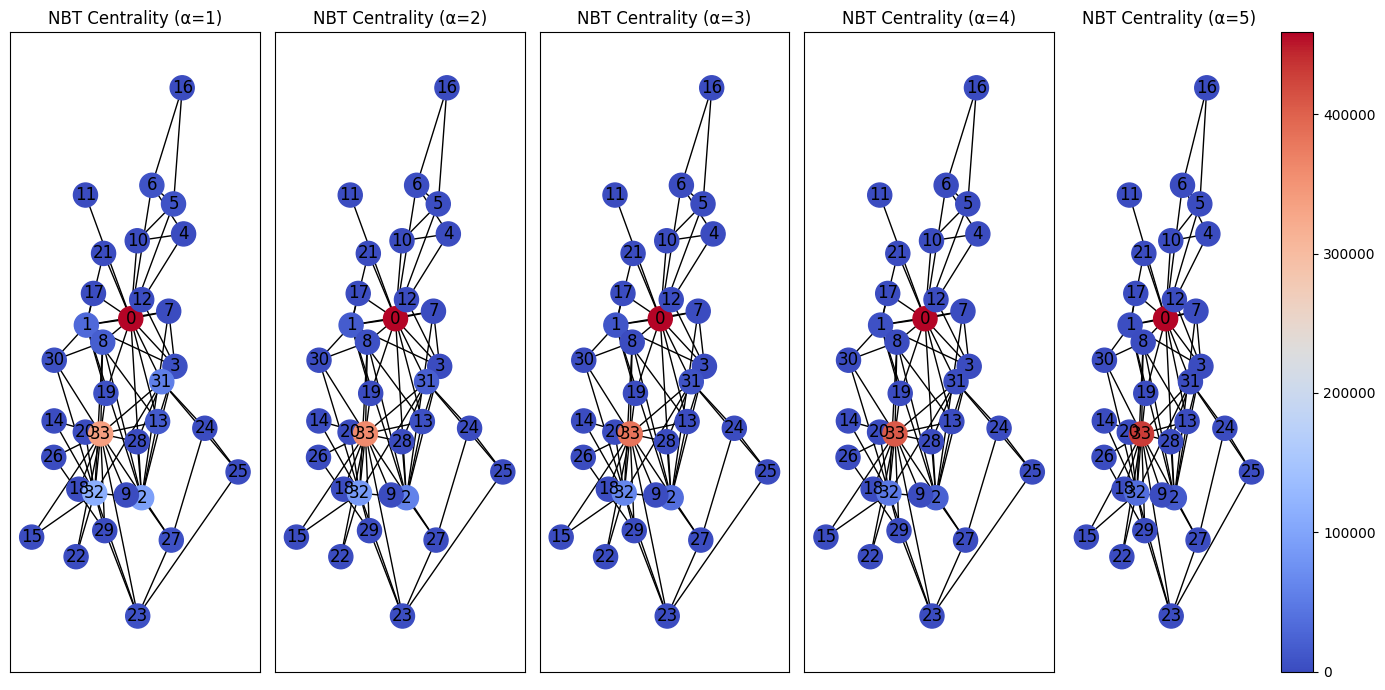

In [5]:
fig, axs = plt.subplots(1, len(ts), figsize=(14, 7))
pos = nx.kamada_kawai_layout(G)
for i, alpha in enumerate(ts):
    ax = axs[i]
    plt.sca(ax)
    plt.title(f'NBT Centrality (α={alpha:.0f})')
    centrality_values = nbt_centralities[alpha]
    sorted_values = [centrality_values[key] for key in sorted(centrality_values.keys())]
    nodes = nx.draw_networkx_nodes(G, pos, node_color=sorted_values, cmap=plt.cm.coolwarm, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
plt.axis('off')
fig.colorbar(nodes, ax=ax)

plt.tight_layout()
plt.show()